In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import statistics as stats
import pyodbc


In [2]:
connection = pyodbc.connect(r'DRIVER={ODBC Driver 17 for SQL Server};'
    r'SERVER=[Server Name];'
    r'DATABASE=AdventureWorks2022;'
    r'Trusted_Connection=yes;'
    r'TrustServerCertificate=yes;')

In [29]:
# We use triple quotes below to encapsulate a larger SQL query.
queryTitle = """SELECT 
    e.JobTitle,
	AVG(e.SickLeaveHours) AS AvgSickLeaveHours,
	SUM(e.SickLeaveHours) AS TotalSickLeaveHours,
	COUNT(*) AS EmployeeCount
FROM 
    HumanResources.Employee e
GROUP BY
    e.JobTitle
ORDER BY 
    TotalSickLeaveHours DESC;"""

In [30]:
dftitle = pd.read_sql(queryTitle, connection)

C:\Users\rache\AppData\Local\Temp\ipykernel_10496\2634150559.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  dftitle = pd.read_sql(queryTitle, connection)


In [33]:
dftitle.head()

,JobTitle,AvgSickLeaveHours,TotalSickLeaveHours,EmployeeCount
0,Production Technician - WC40,49,1287,26
1,Production Technician - WC50,43,1120,26
2,Production Technician - WC10,65,1109,17
3,Production Technician - WC30,36,919,25
4,Production Technician - WC45,59,896,15


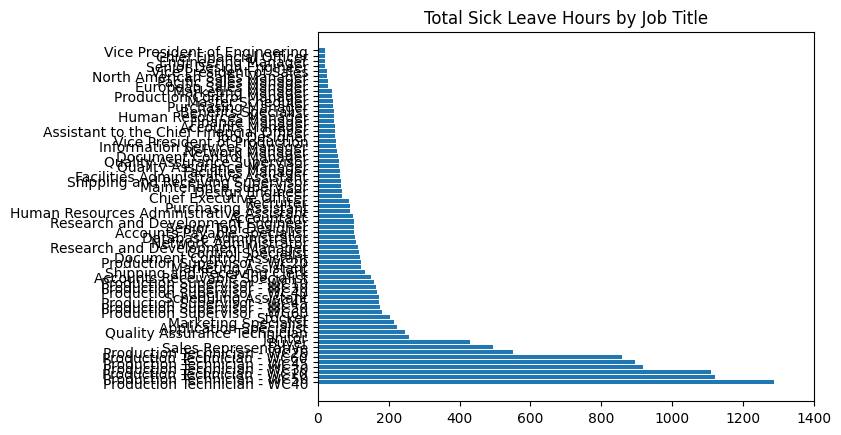

In [37]:
plt.barh(dftitle["JobTitle"], dftitle["TotalSickLeaveHours"])
plt.xlim(0,1400)
plt.title("Total Sick Leave Hours by Job Title")
plt.show()

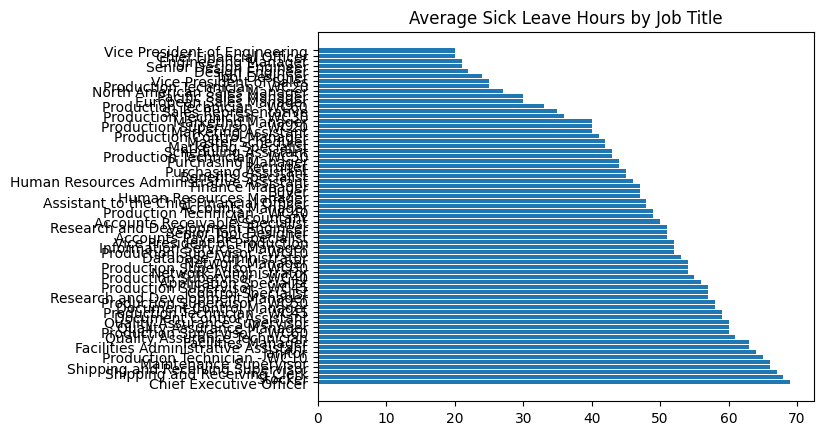

In [38]:
dftitle2 = dftitle.sort_values('AvgSickLeaveHours', ascending=False)
plt.barh(dftitle2['JobTitle'], dftitle2['AvgSickLeaveHours'])
plt.title("Average Sick Leave Hours by Job Title")
plt.show()